In [1]:
from helper import *
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
fo = pd.ExcelFile('cleaned2016.xls') 
# clean-data.xlsx
df = pd.read_excel(fo, 'Sheet1')
print(df)

                                                   text
0        simulasi jaringan komputer cisco packet tracer
1     analisis qos quality service jaringan internet...
2       model ujian nasional komputer manfaat tantangan
3     perancangan simulasi jaringan virtual software...
4     implementasi computer cluster open source peny...
5     analisis performa desain jaringan komputer top...
6     analisis sistem keamanan jaringan switch port ...
7     studi pemanfaatan network monitoring system in...
8     unjuk kerja intrusion prevention sistem ips su...
9            penggunaan mikrotik router jaringan server
10    rancang bangun sistem monitoring keamanan jari...
11    pemanfaatan fitur tunneling virtual interface ...
12                 jaringan komputer pendekatan praktis
13    analisa pencegahan aktivitas ilegal didalam ja...
14    pemanfaatan remote access memonitoring kompute...
15    analisa perancangan jaringan private cloud com...
16    sistem monitoring jaringan exhibition netw

In [3]:
#drop empty line
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

text = df['text']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list[:1])

9694
[['simulasi', 'jaringan', 'komputer', 'cisco', 'packet', 'tracer']]


In [4]:
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs, minimum count 5 means only that appear 5 times or more.
bigram = Phrases(text_list, min_count=5)
trigram = Phrases(bigram[text_list], min_count=5)

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
            
print(text_list)

[['simulasi', 'jaringan', 'komputer', 'cisco', 'packet', 'tracer', 'jaringan_komputer', 'jaringan_komputer', 'jaringan_komputer'], ['analisis', 'qos', 'quality', 'service', 'jaringan', 'internet', 'studi', 'kasus', 'upt', 'loka', 'uji', 'teknik', 'penambangan', 'jampang', 'kulon', 'lipi', 'quality_service', 'jaringan_internet', 'studi_kasus', 'quality_service', 'jaringan_internet', 'studi_kasus', 'quality_service', 'jaringan_internet', 'studi_kasus'], ['model', 'ujian', 'nasional', 'komputer', 'manfaat', 'tantangan', 'ujian_nasional', 'ujian_nasional', 'ujian_nasional'], ['perancangan', 'simulasi', 'jaringan', 'virtual', 'software', 'define', 'networking'], ['implementasi', 'computer', 'cluster', 'open', 'source', 'penyeimbang', 'beban', 'sistem', 'jaringan', 'komputer', 'open_source', 'jaringan_komputer', 'jaringan_komputer', 'open_source', 'jaringan_komputer'], ['analisis', 'performa', 'desain', 'jaringan', 'komputer', 'top', 'down', 'network', 'desain', 'studi', 'kasus', 'merah', 'p

In [5]:
phrasedf = pd.DataFrame(text_list)
print(phrasedf)

                    0              1                2             3   \
0             simulasi       jaringan         komputer         cisco   
1             analisis            qos          quality       service   
2                model          ujian         nasional      komputer   
3          perancangan       simulasi         jaringan       virtual   
4         implementasi       computer          cluster          open   
5             analisis       performa           desain      jaringan   
6             analisis         sistem         keamanan      jaringan   
7                studi    pemanfaatan          network    monitoring   
8                unjuk          kerja        intrusion    prevention   
9           penggunaan       mikrotik           router      jaringan   
10             rancang         bangun           sistem    monitoring   
11         pemanfaatan          fitur        tunneling       virtual   
12            jaringan       komputer       pendekatan       pra

In [6]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=1, no_above=0.5)
print(dictionary)

Dictionary(12300 unique tokens: ['cisco', 'jaringan', 'jaringan_komputer', 'komputer', 'packet']...)


In [7]:
#build bag of words (corpus)
bow = [dictionary.doc2bow(doc) for doc in text_list]

print(len(bow))
# print(doc_term_matrix[100])

# calculate TF-IDF
tfidf = models.TfidfModel(bow)
corpus_tfidf = tfidf[bow]
# similarity = pd.DataFrame(corpus_tfidf, columns=['Topic']).to_csv("similarity.csv")

# print(corpus_tfidf)

# feature_names = tfidf.get_feature_names()
# corpus_index = [n for n in corpus_tfidf]

# showme = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=corpus_index)
# print(showme)

# for i in corpus_tfidf:
#     result = pd.DataFrame()
#     result = result.append(pd.Series(corpus_tfidf), ignore_index=True)
#     print(result)

9694


In [8]:
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    np.random.seed(9)
    model_list = []
    num_topics = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

# num_topics

In [9]:
start=2
limit=20
step=2
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)

In [10]:
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 10))

Num Topics = 2  has Coherence Value of 0.2044095703
Num Topics = 4  has Coherence Value of 0.325789622
Num Topics = 6  has Coherence Value of 0.3932060495
Num Topics = 8  has Coherence Value of 0.4141402992
Num Topics = 10  has Coherence Value of 0.4101799503
Num Topics = 12  has Coherence Value of 0.4729600183
Num Topics = 14  has Coherence Value of 0.4619267305
Num Topics = 16  has Coherence Value of 0.4876019159
Num Topics = 18  has Coherence Value of 0.4982413639


In [12]:
from pprint import pprint

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=18)
pprint(model.print_topics())

[(0,
  '0.010*"smp_negeri" + 0.007*"politeknik_negeri" + 0.007*"client_server" + '
  '0.006*"expert_system" + 0.006*"program_studi" + 0.006*"basis_data" + '
  '0.005*"kelapa_sawit" + 0.005*"sistem_pakar" + 0.005*"jarak_jauh" + '
  '0.005*"aplikasi"'),
 (1,
  '0.015*"sistem_pakar" + 0.011*"mendiagnosa_penyakit" + '
  '0.010*"bahasa_pemrograman" + 0.010*"data_warehouse" + '
  '0.007*"diagnosa_penyakit" + 0.007*"pakar" + 0.006*"tenaga_kerja" + '
  '0.006*"rumah_tangga" + 0.006*"penyakit" + 0.005*"mendiagnosa"'),
 (2,
  '0.010*"teknologi_informasi" + 0.009*"rumah_sakit" + 0.009*"metode_profile" '
  '+ 0.008*"informasi" + 0.008*"e_commerce" + 0.006*"sistem_informasi" + '
  '0.006*"qr_code" + 0.006*"logika_fuzzy" + 0.006*"studi_kasus" + '
  '0.006*"kegiatan"'),
 (3,
  '0.022*"informasi_geografis" + 0.011*"geografis" + '
  '0.010*"information_system" + 0.010*"rancang_bangun" + 0.009*"lokasi" + '
  '0.008*"sistem_informasi" + 0.008*"informasi" + 0.007*"studi_kasus" + '
  '0.007*"perangkat_mobi

In [13]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=18)

for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.015*"penunjang_keputusan" + 0.015*"studi_kasus" + 0.015*"augmented_reality" + 0.009*"sms_gateway" + 0.008*"sistem_informasi" + 0.008*"informasi" + 0.007*"teknik_informatika" + 0.007*"pengolahan_data" + 0.007*"perancangan" + 0.007*"e_commerce"
Topic: 1 Word: 0.014*"rancang_bangun" + 0.011*"informasi_akademik" + 0.011*"sistem_informasi" + 0.010*"informasi" + 0.010*"perangkat_lunak" + 0.009*"sekolah_menengah" + 0.009*"algoritma_genetika" + 0.008*"informasi_administrasi" + 0.007*"administrasi" + 0.006*"perangkat_mobile"
Topic: 2 Word: 0.019*"sistem_pendukung" + 0.016*"keputusan_penentuan" + 0.014*"smartphone_android" + 0.009*"hama_penyakit" + 0.009*"smartphone" + 0.009*"penerima_beasiswa" + 0.009*"pengolahan_citra" + 0.008*"keputusan" + 0.008*"sistem_pendukung_keputusan_penentuan" + 0.008*"pendukung"
Topic: 3 Word: 0.041*"sistem_pendukung" + 0.020*"keputusan_pemilihan" + 0.018*"metode_forward" + 0.018*"pendukung" + 0.017*"keputusan" + 0.013*"sistem_pakar" + 0.012*"metode_s

# Dominant topic and its percentage contribution in each document

In [14]:
def format_topics_sentences(ldamodel=None, corpus=bow, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        # check notes 28/9
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(model, corpus=bow, texts=text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['No_Dokumen', 'Topik_Dominan', 'Persentase_Kontribusi', 'Kata_Kunci', 'Teks']
df_dominant_topic.head(247)

,No_Dokumen,Topik_Dominan,Persentase_Kontribusi,Kata_Kunci,Teks
0,0,12.0,0.8028,"operasi, sistem_operasi, rancang_bangun, mata_...","[simulasi, jaringan, komputer, cisco, packet, ..."
1,1,12.0,0.4536,"operasi, sistem_operasi, rancang_bangun, mata_...","[analisis, qos, quality, service, jaringan, in..."
2,2,5.0,0.6808,"pengembangan_media, metode_profile, operasi_an...","[model, ujian, nasional, komputer, manfaat, ta..."
3,3,17.0,0.7127,"pembelajaran, model_pembelajaran, rumah_sakit,...","[perancangan, simulasi, jaringan, virtual, sof..."
4,4,14.0,0.4979,"metode_topsis, topsis, analisa_perancangan, hi...","[implementasi, computer, cluster, open, source..."
5,5,12.0,0.6867,"operasi, sistem_operasi, rancang_bangun, mata_...","[analisis, performa, desain, jaringan, kompute..."
6,6,8.0,0.6171,"mata_pelajaran, information_system, qr_code, p...","[analisis, sistem, keamanan, jaringan, switch,..."
7,7,9.0,0.5101,"metode_ahp, smp_negeri, fuzzy_inference, studi...","[studi, pemanfaatan, network, monitoring, syst..."
8,8,8.0,0.8505,"mata_pelajaran, information_system, qr_code, p...","[unjuk, kerja, intrusion, prevention, sistem, ..."
9,9,11.0,0.8951,"tugas_akhir, metode_certainty, sistem_pakar, r...","[penggunaan, mikrotik, router, jaringan, serve..."


In [15]:
# Generate dataframe from list and write to xlsx.
pd.DataFrame(df_dominant_topic, columns=['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']).to_excel('topics.xls', header=True, index=False)

In [16]:
count_topics = df_dominant_topic['Topik_Dominan'].value_counts()
count_topics

3.0     1467
4.0      633
1.0      598
13.0     595
2.0      579
0.0      575
17.0     569
7.0      557
12.0     523
6.0      522
15.0     497
11.0     428
5.0      416
9.0      391
14.0     384
8.0      368
16.0     319
10.0     273
Name: Topik_Dominan, dtype: int64

In [17]:
# matplotlib inline

Text(0.5,1,'Persebaran Banyak Judul Penelitian Berdasarkan Topik')

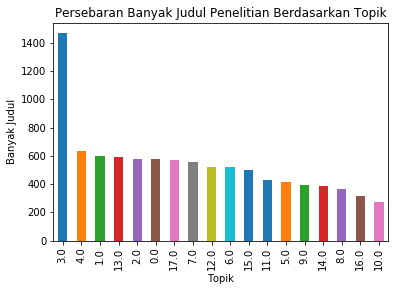

In [18]:
count_topics.plot.bar()

plt.xlabel('Topik')
plt.ylabel('Banyak Judul')
plt.title('Persebaran Banyak Judul Penelitian Berdasarkan Topik')

# The most representative sentence for each topic

In [19]:
# Display setting to show more characters in column
# Mallet
pd.options.display.max_colwidth = 100

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9550,"penunjang_keputusan, studi_kasus, augmented_reality, sms_gateway, sistem_informasi, informasi, t...","[rancang, bangun, sistem, informasi, keranjang, belanja, sistem, billing, webhosting, studi, kas..."
1,1.0,0.9622,"rancang_bangun, informasi_akademik, sistem_informasi, informasi, perangkat_lunak, sekolah_meneng...","[sistem, perpustakaan, radio, frequency, identification, rfid, pendekatan, smart, city, studi, k..."
2,2.0,0.9606,"sistem_pendukung, keputusan_penentuan, smartphone_android, hama_penyakit, smartphone, penerima_b...","[sistem, pendukung, keputusan, pemilihan, mahasiswa, berprestasi, jaringan, syaraf, tiruan, back..."
3,3.0,0.9730,"sistem_pendukung, keputusan_pemilihan, metode_forward, pendukung, keputusan, sistem_pakar, metod...","[rancang, bangun, aplikasi, sistem, pakar, diagnosa, penyakit, gigi, mulut, metode, forward, cha..."
4,4.0,0.9606,"sistem_pakar, kota_palembang, sekolah_dasar, metode_certainty, pakar, mendiagnosa_penyakit, meto...","[aplikasi, sistem, pakar, kerusakan, mesin, chiller, metode, backward, chaining, web, studi, kas..."
5,5.0,0.9528,"pengembangan_media, metode_profile, operasi_android, citra_digital, penerimaan_siswa, android, p...","[rancang, bangun, media, pembantu, pembelajaran, cloud, computing, paket, keahlian, teknik, komp..."
6,6.0,0.9550,"rancang_bangun, rekayasa_perangkat, smk_negeri, sms_gateway, kendaraan_bermotor, platform_androi...","[metode, jaringan, syaraf, tiruan, learning, vector, quantization2, lvq2, mengklasifikasi, jenis..."
7,7.0,0.9606,"informasi_akuntansi, informasi_geografis, informasi_manajemen, sistem_informasi, informasi, akun...","[pengaruh, efektivitas, sistem, informasi, akuntansi, motivasi, kinerja, karyawan, studi, kasus,..."
8,8.0,0.9475,"mata_pelajaran, information_system, qr_code, palembang, waterfall, system, information, bantuan,...","[optimasi, tebal, lapisan, recast, kekasaran, permukaan, microcrack, proses, pemesinan, wire, el..."
9,9.0,0.9674,"metode_ahp, smp_negeri, fuzzy_inference, studi_kasus, ahp, pembelajaran_interaktif, user_interfa...","[rancang, bangun, sistem, informasi, pemetaan, lokasi, kerja, praktek, geographic, information, ..."


In [20]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim-2016.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.268600 -0.008628       1        1  10.412541
13    -0.001374 -0.125356       2        1   6.266438
4     -0.047208 -0.094570       3        1   5.916932
2     -0.100007  0.099498       4        1   5.898200
17     0.010164  0.136757       5        1   5.829214
7      0.051136 -0.007833       6        1   5.685615
0      0.030775 -0.010936       7        1   5.647011
12     0.029288 -0.053402       8        1   5.646518
1      0.063185 -0.058998       9        1   5.615809
6      0.012227  0.010271      10        1   5.276482
11    -0.029253 -0.088102      11        1   5.214058
15     0.070456 -0.013550      12        1   5.100763
14    -0.031233  0.058627      13        1   4.947137
9      0.024160 -0.013980      14        1   4.923215
5      0.040254  0.056861      15        1   4.869617
8      0.057314  0.040487      16        1   4.4863

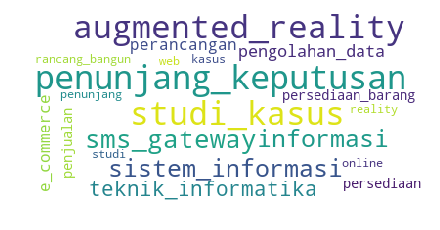

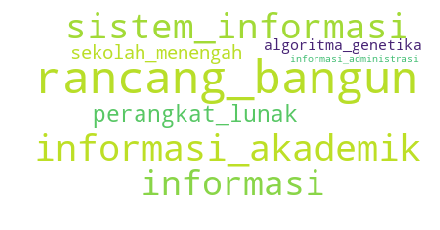

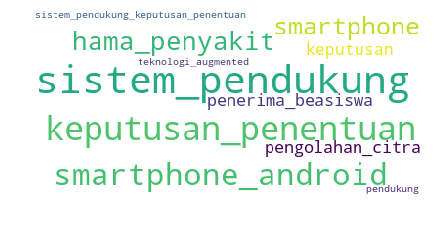

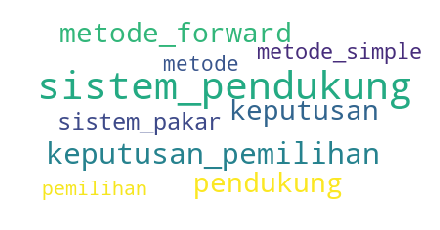

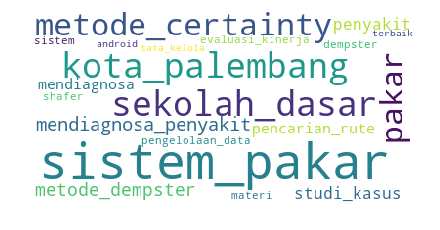

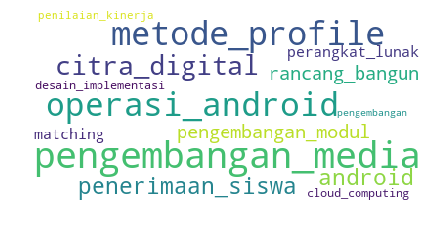

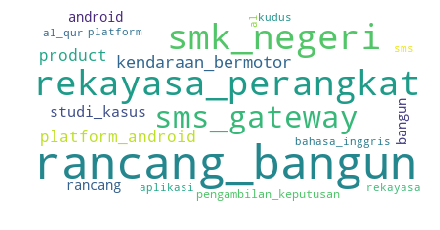

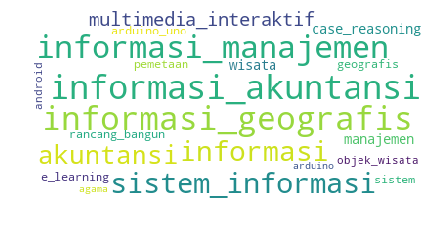

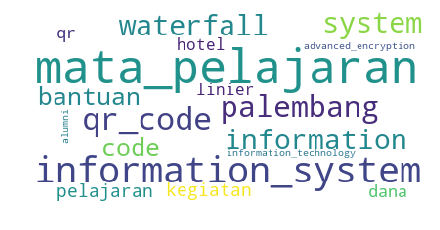

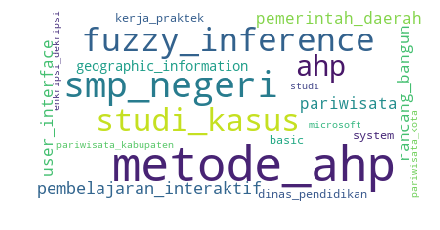

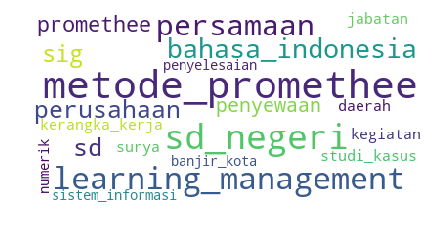

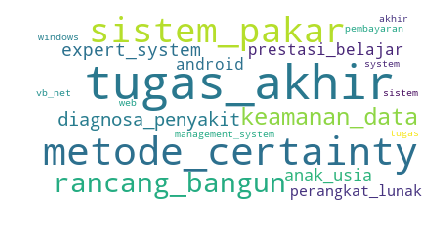

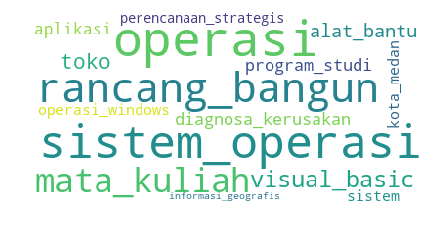

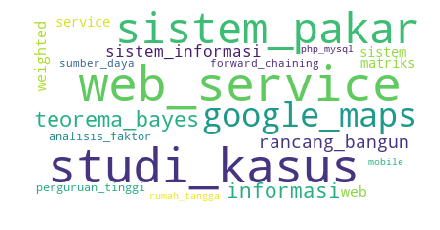

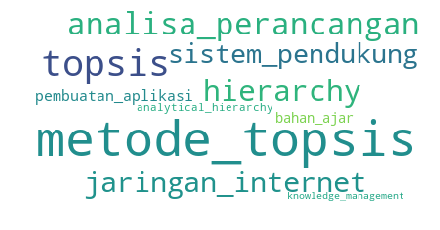

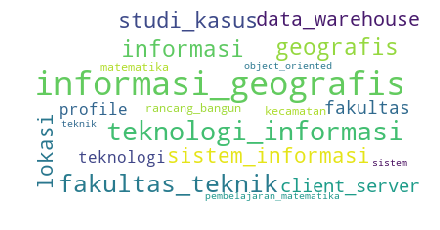

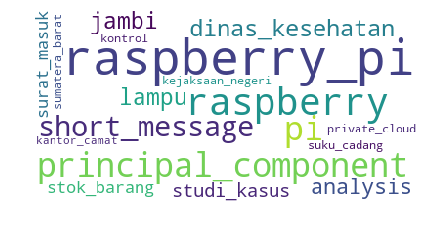

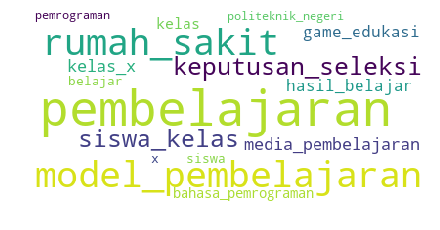

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

# # lower max_font_size, change the maximum number of word and lighten the background:
# wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=50, max_words=20, background_color="white", min_font_size=10).fit_words(dict(model.show_topic(t,200))))
    plt.axis("off")
#     plt.title("Topic #" + str(t))
#     plt.savefig("wcld-topic-"+str(t)+".png", facecolor='k')
#     plt.tight_layout(pad=0)
    plt.savefig("wcld-topic-"+str(t)+".png", facecolor='none', bbox_inches='tight')
    
# plt.show()

In [22]:
import pickle
filename = 'model2016.pkl'
pickle.dump(model, open(filename, 'wb'))
model.save('lda.model')